In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
from sqlalchemy import create_engine

from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

# from login_credentials import username
# from login_credentials import password

# Store CSV file into DataFrame


In [2]:
# read csv file Android VS IOS
android_vs_ios_csv = "static/Data/antutu_android_vs_ios_v4.csv"


In [3]:
# Create dataframe
android_vs_ios_df = pd.read_csv(android_vs_ios_csv, encoding='iso-8859-1')
android_vs_ios_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


In [4]:
# Preforming a .count to make sure that the data is complete
print(android_vs_ios_df.count())

ï»¿Device      179
CPU            179
GPU            179
MEM            179
UX             179
Total Score    179
dtype: int64


In [5]:
# read csv file Benchmark
benchmark_csv = "static/Data/ML_ALL_benchmarks.csv"

In [6]:
# Create dataframe
benchmark_df = pd.read_csv(benchmark_csv, encoding='iso-8859-1')
benchmark_df.head()

,ï»¿device,company,cpuName,cores,clock,cpuScore,gpuScore,npuScore
0,iPhone 13 Pro Max,Apple,A15 Bionic,6,3230,935,2273,2676
1,iPhone 13 Pro,Apple,A15 Bionic,6,3230,931,2261,2665
2,iPhone 13 mini,Apple,A15 Bionic,6,3230,924,1852,2660
3,iPad Pro (12.9-inch 5th generation),Apple,M1,8,3190,1013,2824,2657
4,iPad Pro (11-inch 3rd generation),Apple,M1,8,3190,1011,2842,2656


In [7]:
# Preforming a .count to make sure that the data is complete
print(benchmark_df.count())

ï»¿device    188
company      188
cpuName      188
cores        188
clock        188
cpuScore     188
gpuScore     188
npuScore     188
dtype: int64


In [8]:
# read csv file Smartphone CPU
smartphone_cpu_csv = "static/Data/smartphone_cpu_stats.csv"

In [9]:
# Create dataframe
smartphone_cpu_df = pd.read_csv(smartphone_cpu_csv, encoding='iso-8859-1')
smartphone_cpu_df.head()

,ï»¿rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,Â (2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,Â (1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,Â (1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,Â (2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,Â (1+3+4),2995,Adreno 660


In [10]:
# Preforming a .count to make sure that the data is complete
print(smartphone_cpu_df.count())

ï»¿rank            125
company            125
cpuName            125
geekbenchSingle    125
geekbenchMulti     125
antutu9            125
coreCount          125
coreConfig         125
clockSpeed         125
gpu                125
dtype: int64


In [11]:
smartphone_cpu_df = pd.read_csv(smartphone_cpu_csv, encoding='iso-8859-1')
smartphone_cpu_df.head()

,ï»¿rank,company,cpuName,geekbenchSingle,geekbenchMulti,antutu9,coreCount,coreConfig,clockSpeed,gpu
0,1,Apple,A15 Bionic,1727,4688,794346,6,Â (2+4),3223,Apple GPU
1,2,MediaTek,Dimensity 9000,1269,4267,1017817,8,Â (1+3+4),3050,Mali-G710
2,3,Qualcomm,Snapdragon 8 Gen 1,1213,3765,1028349,8,Â (1+3+4),3000,Adreno 730
3,4,Apple,A14 Bionic,1581,4093,730211,6,Â (2+4),3100,Apple GPU
4,5,Qualcomm,Snapdragon 888 Plus,1162,3626,838764,8,Â (1+3+4),2995,Adreno 660


# Clean the data

In [12]:
# Fix column names(need to figure why it wont drop the weird characters on device)
android_vs_ios_df=android_vs_ios_df.rename(columns={'ï»¿device':'Device','ï»¿': '' })
android_vs_ios_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


In [13]:
benchmark_df=android_vs_ios_df.rename(columns={'ï»¿device':'Device','ï»¿': '' })
benchmark_df.head()

,ï»¿Device,CPU,GPU,MEM,UX,Total Score
0,iPad Pro 5 (12.9-inch)Â (8+256),351192,741383,183160,153993,1429728
1,iPad Pro 5 (11-inch)Â (8+128),351212,722399,137145,149463,1360219
2,iPad Air 5Â (8+64),345275,635015,107955,140140,1228385
3,Red Magic 7Â (S-8 Gen 1Â 18/256),235998,445681,175442,181650,1038771
4,Redmi K50 ProÂ (M-9000Â 8/128),244999,390026,169449,182367,986840


# Merge the data

In [14]:
# ***having issues with merging thedata because of the weird characters on device***

#Combine the data into a single dataset
# merged_phone_df = pd.merge(android_vs_ios_df, benchmark_df, how="outer", on=["ï»¿Device"])
# merged_phone_df

# Manipulate the data

In [15]:
#Run this code to find the pairwise correlation of all columns in the dataframe
#This allows the creation of the heatmap below
corr_data=android_vs_ios_df.corr()
corr_data

,CPU,GPU,MEM,UX,Total Score
CPU,1.000000,0.916648,0.788749,0.761240,0.953742
GPU,0.916648,1.000000,0.807061,0.732169,0.977957
MEM,0.788749,0.807061,1.000000,0.879410,0.888577
UX,0.761240,0.732169,0.879410,1.000000,0.837396
Total Score,0.953742,0.977957,0.888577,0.837396,1.000000


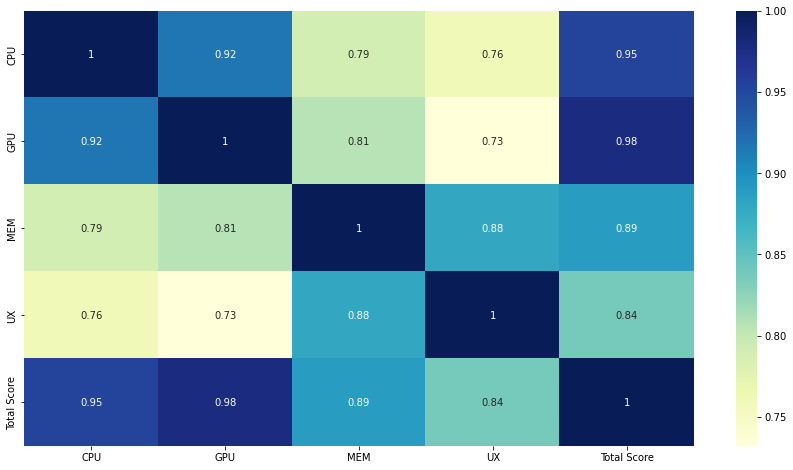

In [16]:
#Shows correlation between all variables against each other
#need to install seaborn in order to plot heatmap

# just testing it out, need to add the real merged table
sns.heatmap(corr_data, annot=True,cmap="YlGnBu")
plt.gcf().set_size_inches(15, 8)
plt.savefig("static/Img/heatmapp.png")
plt.show()

In [17]:
#Run the code below to get a statistical detail of the data set
# .describe()

# Scrape Phone Home pages


In [18]:
# Set Executable Path & Initialize Chrome Browser
# scrape the news site for latest phone news stories
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\Matt\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache


In [19]:
# Visit the Pocket-Lint News Site
# proof of concept to later build a for loop for the whole page
url = "https://www.pocket-lint.com/phones/news"
browser.visit(url)

In [43]:
# Parse Results HTML with BeautifulSoup
# Find Everything Inside:
#   <div class="article">
#     

html = browser.html
news_soup = BeautifulSoup(html, "html.parser")
slide_element = news_soup.select_one("div.articles")

In [44]:
slide_element.find("div", class_="article")

<div class="article" data-type="News">
<a href="https://www.pocket-lint.com/phones/news/htc/161660-htc-desire-22-pro-is-the-viverse-phone-we-were-expecting" title="HTC Desire 22 Pro is the Viverse phone we were expecting"></a>
<span class="article-thumbnail">
<img alt="HTC Desire 22 Pro is the Viverse phone we were expecting" src="//cdn.pocket-lint.com/r/c/120x120/assets/images/161660-homepage-news-htc-desire-22-pro-is-the-viverse-phone-we-were-expecting-image1-abm9ckowq4.jpg"/>
</span>
<div class="article-info">
<span class="article-info-title">
<span>HTC Desire 22 Pro is the Viverse phone we were expecting</span>
</span>
<span class="article-info-publish">
<!--· <span class="best-offer"></span>-->
<span style="display: block; margin-top:2px;"></span>
                By                <span class="author">Rik Henderson</span>
                ·
                <time datetime="2022-06-28T10:46:12+01:00" pubdate="pubdate">28 June 2022</time>
</span>
<p class="article-info-description">HT

In [47]:
# Scrape the Latest News Title
# <span class="artifcle-info-title">
news_title = slide_element.find("span", class_="article-info-title").get_text()
print(news_title)


HTC Desire 22 Pro is the Viverse phone we were expecting



In [54]:
# Scrape for the paragraph
# <p class="article-info-description">
news_p = slide_element.find("p", class_="article-info-description").get_text()
print(news_p)

HTC is back with a new midrange smartphone that, like many of its releases in the last few years, comes with a significant gimmick. 


In [65]:
# create a for loop to scrape for all the article
#Create a list to hold the titles,url,image and paragraph.
phone_title_url_img_par = []
    
    #Write code to retrieve the image urls and titles for each news article.
for i in range(4):
    #create empty dictionary
    phone = {}
    browser.find_by_css('a')[i].click()
#     element = browser.find_link_by_text('article-info-title').first
#     img_url = element['title']
    title = browser.find_by_css("span.article-info-title").text 
#     hemispheres["img_url"] = img_url
    hemispheres["article"] = title
    phone_title_url_img_par.append(hemispheres)
    browser.back()

ElementDoesNotExist: no elements could be found with css "span.article-info-title"